In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load our dataset
df = pd.read_csv("Dataset .csv")

In [9]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [19]:
#restaurants with the highest and lowest number of votes

grouped_df= df.groupby('Restaurant Name')['Votes'].sum().reset_index()
max_votes = grouped_df['Votes'].max()
min_votes = grouped_df['Votes'].min()

print(max_votes)
print(min_votes)

#lets find correspondingrestaurant names
max_votes_restaurant = grouped_df.loc[grouped_df['Votes'].idxmax()]['Restaurant Name']
min_votes_restaurant = grouped_df.loc[grouped_df['Votes'].idxmin()]['Restaurant Name']

print(f"Restaurant {max_votes_restaurant} has highest number of votes:{max_votes} \n")
print(f"Restaurant {min_votes_restaurant} has lowest number of votes:{min_votes} \n")



28142
0
Restaurant Barbeque Nation has highest number of votes:28142 

Restaurant #hashtag has lowest number of votes:0 



In [21]:
# as lowest one has 0 voting so we find second last so that we can get restaurant have second last rating
second_lowest_votes = grouped_df.nsmallest(2, 'Votes').iloc[1]['Votes']
second_lowest_restaurant = grouped_df.nsmallest(2, 'Votes').iloc[1]['Restaurant Name']

print(second_lowest_votes)
print(second_lowest_restaurant)

0
13 Cafe


In [39]:
#correlation between the number of votes and the rating of a restaurant

grouped_votes= df.groupby('Restaurant Name')['Votes'].sum().reset_index()
grouped_rating= df.groupby('Restaurant Name')['Aggregate rating'].sum().reset_index()

#merge the dataframes
merged_df = pd.merge(grouped_votes, grouped_rating, on='Restaurant Name')

correlation = merged_df['Votes'].corr(merged_df['Aggregate rating'])
print("Correlation between the number of votes and the rating of a restaurant:", correlation)


Correlation between the number of votes and the rating of a restaurant: 0.4603441470602463


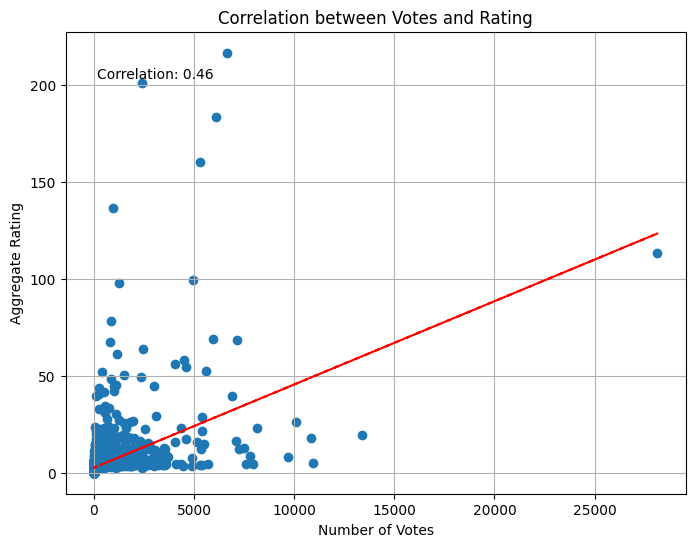

In [40]:
#visualizing
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Votes'], merged_df['Aggregate rating'])
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Correlation between Votes and Rating')
plt.grid(True)

#regression line to the plot
z = np.polyfit(merged_df['Votes'], merged_df['Aggregate rating'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Votes'], p(merged_df['Votes']), "r--")

#lest show our correelation on plot
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')

plt.show()